In [1]:
import torch
import torchvision   #torchvision : library for images
from torchvision.datasets import MNIST

In [2]:
dataset=MNIST(root='data/',download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
print(len(dataset))
print(type(dataset))

60000
<class 'torchvision.datasets.mnist.MNIST'>


In [5]:
test_dataset=MNIST(root='data/',train=False)

In [6]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [7]:
# Look at a sample element from the training dataset
# It's a pair, consisting of a 28x28px image and a label. 
# The image is an object of the class PIL.Image.Image, which is a part of 
# the Python imaging library Pillow. We can view the image within
# Jupyter using matplotlib, the de-facto plotting and graphing library 
# for data science in Python.
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 3


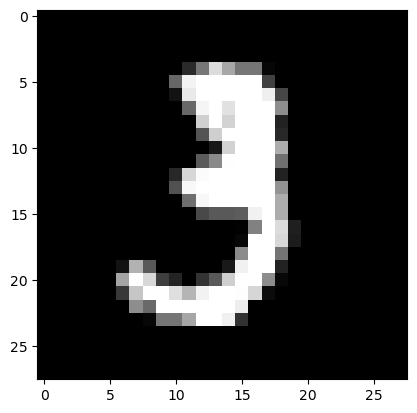

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 2


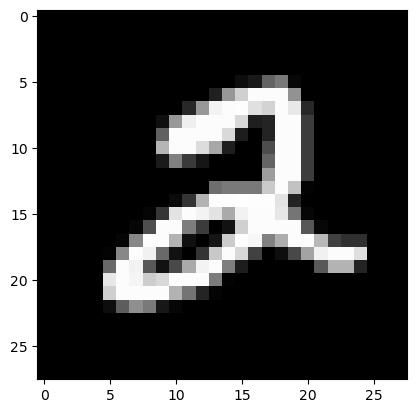

In [10]:
image, label = dataset[5]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [11]:
import torchvision.transforms as transforms

#PyTorch datasets allow us to specify one or more transformation function that are applied to the immages as they are loaded.
# The torchvvision.transforms module contains many such predefine functions. 
# We'll use the ToTensor transform to convert images into PyTorch tensors.

In [12]:
dataset=MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [13]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
img_tensor, label=dataset[5]
print(img_tensor.shape, label)

# The image is now converted to a 1*28*28 tensor. The first dimension tracks color channels.
# The second and third dimensions represent pixels along the height and width of the image,
# Since, images in the MNIST dataset are grayscale, theree's just one channel.
# Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

torch.Size([1, 28, 28]) 2


In [15]:
img_tensor, label=dataset[10]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 3


In [16]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [17]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))


# The values range from 0 to 1, with 0 representing black and 1 represent white.
# The vvalues in between different shades of grey.

tensor([[0.0000, 0.0000, 0.0000, 0.0941, 0.8196],
        [0.0000, 0.0000, 0.3569, 0.5373, 0.9922],
        [0.1569, 0.8392, 0.9804, 0.9961, 0.9961],
        [0.3176, 0.9686, 0.9961, 0.9961, 0.9961],
        [0.0000, 0.4314, 0.9647, 0.9961, 0.9961]])
tensor(0.9961) tensor(0.)


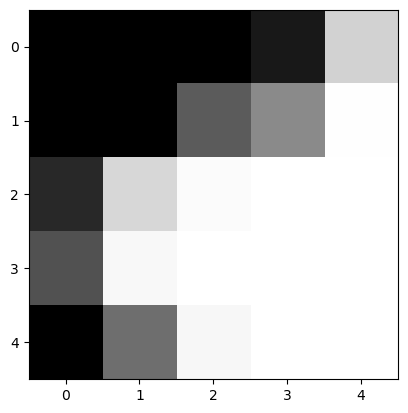

In [18]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [19]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
print(len(train_ds))
print(len(val_ds))

50000
10000


In [20]:
from torch.utils.data import DataLoader

train_loader=DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader=DataLoader(val_ds, batch_size=128)

#### Model

In [21]:
import torch.nn as nn

In [22]:
input_size=28*28
num_classes=10

model=nn.Linear(input_size, num_classes)

In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0206, -0.0256,  0.0297,  ...,  0.0238,  0.0015, -0.0281],
        [ 0.0263,  0.0267,  0.0077,  ...,  0.0065,  0.0125,  0.0147],
        [ 0.0251,  0.0312, -0.0254,  ...,  0.0227, -0.0344,  0.0109],
        ...,
        [ 0.0105,  0.0283, -0.0185,  ..., -0.0116,  0.0029, -0.0236],
        [ 0.0153, -0.0337,  0.0254,  ..., -0.0271, -0.0356, -0.0034],
        [ 0.0341,  0.0167,  0.0026,  ..., -0.0266,  0.0215,  0.0085]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0253, -0.0156,  0.0003, -0.0004,  0.0027,  0.0139, -0.0333,  0.0175,
        -0.0110,  0.0023], requires_grad=True)

In [25]:
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        
        return image, label

In [26]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images)
    print(outputs)
    break

tensor([7, 6, 9, 2, 9, 8, 2, 7, 6, 8, 9, 1, 7, 3, 7, 4, 1, 3, 5, 6, 6, 1, 8, 6,
        4, 7, 4, 9, 1, 1, 1, 2, 0, 9, 0, 0, 0, 2, 8, 0, 9, 1, 1, 4, 3, 2, 7, 3,
        7, 7, 0, 3, 1, 7, 8, 2, 2, 9, 7, 4, 0, 2, 3, 0, 4, 2, 0, 3, 3, 5, 2, 0,
        6, 9, 7, 9, 8, 1, 1, 0, 4, 0, 3, 7, 3, 5, 0, 2, 6, 1, 1, 3, 6, 8, 4, 0,
        4, 1, 0, 2, 4, 5, 3, 2, 8, 0, 9, 0, 2, 1, 5, 7, 7, 4, 6, 8, 0, 9, 7, 0,
        0, 3, 9, 1, 1, 7, 8, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [27]:
images.shape

torch.Size([128, 1, 28, 28])

In [28]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [29]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(input_size, num_classes)
        
        
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out=self.linear(xb)
        return out
    
model=MnistModel()

In [30]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [31]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0071,  0.0274,  0.0069,  ..., -0.0346, -0.0268, -0.0230],
         [ 0.0305,  0.0068,  0.0107,  ..., -0.0322, -0.0272,  0.0281],
         [-0.0331, -0.0001,  0.0066,  ...,  0.0135, -0.0038,  0.0186],
         ...,
         [ 0.0085,  0.0293,  0.0179,  ...,  0.0026, -0.0230,  0.0028],
         [ 0.0011, -0.0292,  0.0194,  ..., -0.0022, -0.0067, -0.0248],
         [ 0.0013, -0.0230,  0.0147,  ...,  0.0138, -0.0059,  0.0162]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0089,  0.0021, -0.0119,  0.0191, -0.0118,  0.0300,  0.0300, -0.0007,
          0.0194,  0.0313], requires_grad=True)]

In [32]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs=model(images)
    print(outputs)
    break
    
print(outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

tensor([9, 2, 2, 4, 3, 5, 8, 8, 6, 1, 5, 3, 6, 2, 2, 9, 9, 4, 5, 9, 0, 5, 4, 2,
        3, 1, 8, 4, 3, 6, 1, 3, 9, 7, 7, 6, 2, 6, 4, 2, 5, 6, 1, 3, 6, 5, 8, 9,
        2, 8, 9, 5, 9, 6, 0, 4, 8, 0, 3, 3, 1, 0, 2, 9, 7, 8, 0, 9, 7, 8, 3, 8,
        9, 1, 9, 1, 8, 7, 1, 2, 5, 4, 5, 7, 4, 4, 7, 9, 3, 2, 4, 1, 4, 3, 5, 6,
        5, 9, 2, 8, 4, 5, 0, 0, 9, 9, 4, 5, 2, 9, 9, 3, 6, 0, 2, 1, 5, 8, 1, 6,
        7, 3, 6, 1, 8, 8, 5, 4])
torch.Size([128, 1, 28, 28])
tensor([[ 0.2552,  0.0696, -0.1319,  ...,  0.0781,  0.0484, -0.0283],
        [ 0.0559,  0.0991, -0.2325,  ..., -0.0131,  0.1372,  0.3420],
        [-0.0171,  0.1584,  0.0131,  ..., -0.0035,  0.3298,  0.1459],
        ...,
        [ 0.3325, -0.1579,  0.1014,  ...,  0.1176, -0.0830, -0.0467],
        [ 0.3809,  0.3918, -0.1172,  ...,  0.1005, -0.2137,  0.1385],
        [ 0.1150, -0.2377,  0.2547,  ...,  0.1929,  0.1454,  0.0886]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2552,  0.0696, -0.1

In [33]:
import torch.nn.functional as F

# The softmax function is included in the torch.nn.functional 
# package and requires us to specify a dimension along which the 
# function should be applied.

In [34]:
outputs[:2]

tensor([[ 0.2552,  0.0696, -0.1319, -0.0208,  0.4815,  0.0491,  0.0208,  0.0781,
          0.0484, -0.0283],
        [ 0.0559,  0.0991, -0.2325, -0.0925,  0.2346, -0.2924,  0.0071, -0.0131,
          0.1372,  0.3420]], grad_fn=<SliceBackward0>)

In [35]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1172, 0.0974, 0.0796, 0.0889, 0.1470, 0.0954, 0.0927, 0.0982, 0.0953,
         0.0883],
        [0.1014, 0.1059, 0.0760, 0.0874, 0.1213, 0.0716, 0.0966, 0.0947, 0.1100,
         0.1350]])
Sum:  1.0


In [36]:
max_probs, preds =torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 9, 4, 4, 4, 0, 4, 4, 4, 7, 9, 4, 9, 1, 4, 9, 4, 7, 4, 4, 0, 6, 8, 4,
        4, 8, 4, 4, 8, 4, 8, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 9, 7, 4, 4, 4, 4, 0,
        1, 4, 8, 4, 8, 9, 5, 4, 4, 0, 4, 9, 8, 4, 0, 4, 4, 0, 4, 4, 6, 4, 9, 4,
        9, 8, 4, 7, 9, 4, 8, 9, 7, 4, 1, 9, 4, 4, 4, 8, 4, 8, 8, 7, 6, 4, 4, 4,
        8, 4, 4, 4, 8, 4, 4, 0, 8, 7, 4, 9, 8, 8, 4, 6, 4, 9, 8, 8, 9, 8, 0, 4,
        9, 4, 9, 8, 4, 0, 1, 4])
tensor([0.1470, 0.1350, 0.1321, 0.1383, 0.1314, 0.1135, 0.1300, 0.1290, 0.1373,
        0.1203, 0.1379, 0.1164, 0.1235, 0.1365, 0.1347, 0.1381, 0.1676, 0.1227,
        0.1318, 0.1249, 0.1222, 0.1235, 0.1424, 0.1528, 0.1190, 0.1247, 0.1372,
        0.1315, 0.1315, 0.1160, 0.1168, 0.1499, 0.1341, 0.1289, 0.1242, 0.1411,
        0.1269, 0.1213, 0.1225, 0.1386, 0.1216, 0.1333, 0.1240, 0.1262, 0.1231,
        0.1183, 0.1573, 0.1113, 0.1308, 0.1532, 0.1228, 0.1470, 0.1459, 0.1443,
        0.1208, 0.1336, 0.1460, 0.1284, 0.1307, 0.1175, 0.1235, 0.1438, 0.1329,
       

In [37]:
labels

tensor([9, 2, 2, 4, 3, 5, 8, 8, 6, 1, 5, 3, 6, 2, 2, 9, 9, 4, 5, 9, 0, 5, 4, 2,
        3, 1, 8, 4, 3, 6, 1, 3, 9, 7, 7, 6, 2, 6, 4, 2, 5, 6, 1, 3, 6, 5, 8, 9,
        2, 8, 9, 5, 9, 6, 0, 4, 8, 0, 3, 3, 1, 0, 2, 9, 7, 8, 0, 9, 7, 8, 3, 8,
        9, 1, 9, 1, 8, 7, 1, 2, 5, 4, 5, 7, 4, 4, 7, 9, 3, 2, 4, 1, 4, 3, 5, 6,
        5, 9, 2, 8, 4, 5, 0, 0, 9, 9, 4, 5, 2, 9, 9, 3, 6, 0, 2, 1, 5, 8, 1, 6,
        7, 3, 6, 1, 8, 8, 5, 4])

#### Evaluation Metric and Loss Function

In [38]:
outputs[:2]

tensor([[ 0.2552,  0.0696, -0.1319, -0.0208,  0.4815,  0.0491,  0.0208,  0.0781,
          0.0484, -0.0283],
        [ 0.0559,  0.0991, -0.2325, -0.0925,  0.2346, -0.2924,  0.0071, -0.0131,
          0.1372,  0.3420]], grad_fn=<SliceBackward0>)

In [39]:
preds==labels

tensor([False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False,
         True, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False,  True, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True])

In [40]:
torch.sum(preds==labels)

tensor(15)

In [41]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [42]:
accuracy(outputs, labels)

tensor(0.1172)

In [43]:
probs

tensor([[0.1172, 0.0974, 0.0796,  ..., 0.0982, 0.0953, 0.0883],
        [0.1014, 0.1059, 0.0760,  ..., 0.0947, 0.1100, 0.1350],
        [0.0925, 0.1102, 0.0953,  ..., 0.0938, 0.1308, 0.1089],
        ...,
        [0.1322, 0.0809, 0.1049,  ..., 0.1066, 0.0872, 0.0905],
        [0.1304, 0.1318, 0.0792,  ..., 0.0985, 0.0720, 0.1023],
        [0.1054, 0.0741, 0.1212,  ..., 0.1140, 0.1087, 0.1027]],
       grad_fn=<SoftmaxBackward0>)

In [44]:
outputs

tensor([[ 0.2552,  0.0696, -0.1319,  ...,  0.0781,  0.0484, -0.0283],
        [ 0.0559,  0.0991, -0.2325,  ..., -0.0131,  0.1372,  0.3420],
        [-0.0171,  0.1584,  0.0131,  ..., -0.0035,  0.3298,  0.1459],
        ...,
        [ 0.3325, -0.1579,  0.1014,  ...,  0.1176, -0.0830, -0.0467],
        [ 0.3809,  0.3918, -0.1172,  ...,  0.1005, -0.2137,  0.1385],
        [ 0.1150, -0.2377,  0.2547,  ...,  0.1929,  0.1454,  0.0886]],
       grad_fn=<AddmmBackward0>)

In [45]:
loss_fn = F.cross_entropy

In [46]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2875, grad_fn=<NllLossBackward0>)


In [47]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer=opt_func(model.parameters(), lr)
    history=[]
    
    for epoch in range(epochs):
        for batch in train_loader:           #training phase
            loss=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            
        result=evaluate(model,val_loader)        # validation phase
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

In [49]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [51]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [52]:
result0=evaluate(model,val_loader)
result0

{'val_loss': 2.33437442779541, 'val_acc': 0.07634493708610535}

In [53]:
history1=fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9700, val_acc: 0.5726
Epoch [1], val_loss: 1.7008, val_acc: 0.6952
Epoch [2], val_loss: 1.4986, val_acc: 0.7416
Epoch [3], val_loss: 1.3454, val_acc: 0.7656
Epoch [4], val_loss: 1.2273, val_acc: 0.7841


In [56]:
history2=fit(5,0.001,model,train_loader,val_loader)
history2

Epoch [0], val_loss: 0.8570, val_acc: 0.8291
Epoch [1], val_loss: 0.8265, val_acc: 0.8333
Epoch [2], val_loss: 0.7996, val_acc: 0.8367
Epoch [3], val_loss: 0.7759, val_acc: 0.8392
Epoch [4], val_loss: 0.7547, val_acc: 0.8417


[{'val_loss': 0.8569812774658203, 'val_acc': 0.8291139006614685},
 {'val_loss': 0.82645583152771, 'val_acc': 0.8332673907279968},
 {'val_loss': 0.7996311187744141, 'val_acc': 0.8367286324501038},
 {'val_loss': 0.7758920192718506, 'val_acc': 0.8392009735107422},
 {'val_loss': 0.75467848777771, 'val_acc': 0.8416732549667358}]

In [57]:
history3=fit(5,0.001,model,train_loader,val_loader)
history3

Epoch [0], val_loss: 0.7356, val_acc: 0.8442
Epoch [1], val_loss: 0.7184, val_acc: 0.8457
Epoch [2], val_loss: 0.7027, val_acc: 0.8474
Epoch [3], val_loss: 0.6884, val_acc: 0.8488
Epoch [4], val_loss: 0.6752, val_acc: 0.8514


[{'val_loss': 0.7356306910514832, 'val_acc': 0.8442444801330566},
 {'val_loss': 0.7183539271354675, 'val_acc': 0.8457278609275818},
 {'val_loss': 0.7026906609535217, 'val_acc': 0.8474090099334717},
 {'val_loss': 0.6883611083030701, 'val_acc': 0.8487935066223145},
 {'val_loss': 0.675224781036377, 'val_acc': 0.8513647317886353}]

In [58]:
history4=fit(5,0.001,model,train_loader,val_loader)
history4

Epoch [0], val_loss: 0.6631, val_acc: 0.8521
Epoch [1], val_loss: 0.6519, val_acc: 0.8533
Epoch [2], val_loss: 0.6415, val_acc: 0.8549
Epoch [3], val_loss: 0.6318, val_acc: 0.8560
Epoch [4], val_loss: 0.6228, val_acc: 0.8572


[{'val_loss': 0.66313636302948, 'val_acc': 0.8520569801330566},
 {'val_loss': 0.6518996953964233, 'val_acc': 0.853342592716217},
 {'val_loss': 0.6415140628814697, 'val_acc': 0.8549248576164246},
 {'val_loss': 0.6318265795707703, 'val_acc': 0.8560126423835754},
 {'val_loss': 0.6227557063102722, 'val_acc': 0.8571993708610535}]

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

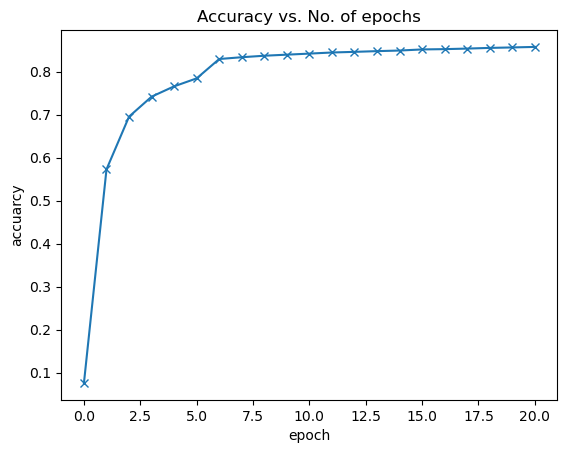

In [59]:
history=[result0]+history1+history2+history3+history4
accuracies=[result['val_acc'] for result in history]
plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuarcy')
plt.title('Accuracy vs. No. of epochs')

In [60]:
# Testing with individual images

In [61]:
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())

torch.Size([1, 28, 28])
1


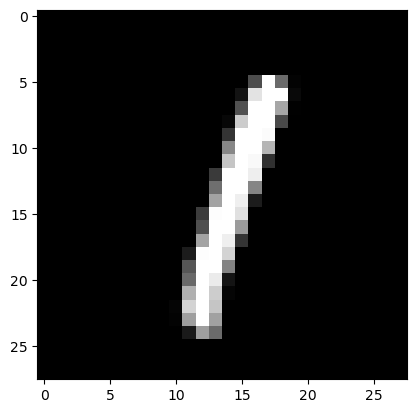

In [66]:
img,label=test_dataset[5]
plt.imshow(img[0],cmap='gray')
print(img.shape)
print(label)

torch.Size([1, 28, 28])
7


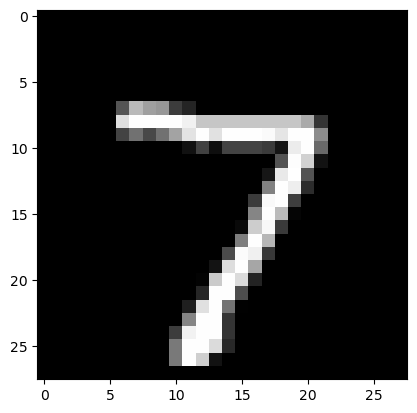

In [67]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print(img.shape)
print(label)

In [68]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()  

# `img.unsqueeze` simply adds another dimension at the begining of the 
# 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views 
# as a batch containing a single image.

# Let's try it out with a few images.

Label: 7 , Predicted: 7


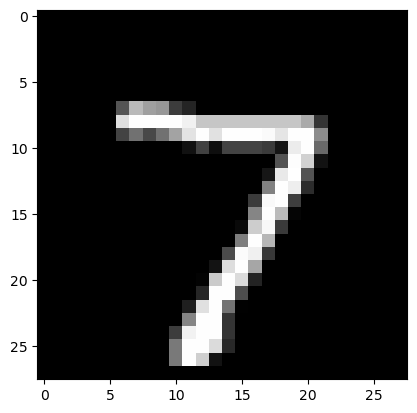

In [69]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


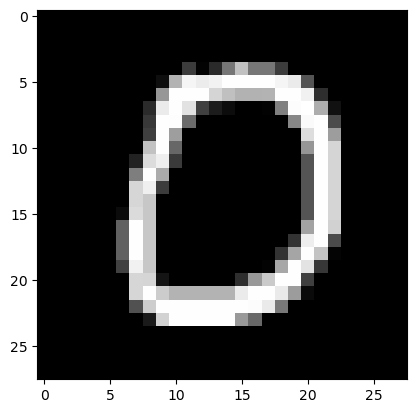

In [70]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


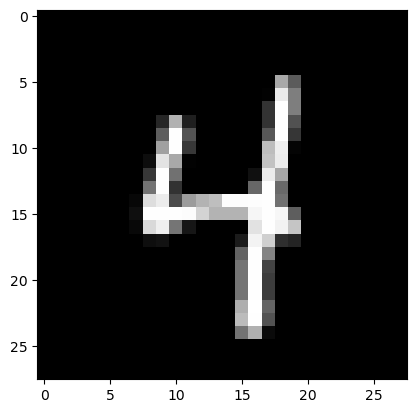

In [72]:
img, label = test_dataset[19]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


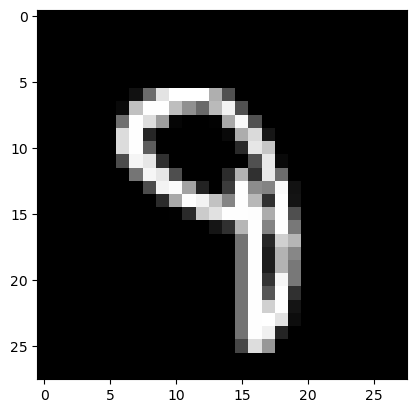

In [74]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [76]:
test_loader = DataLoader(test_dataset, batch_size=128)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5887920260429382, 'val_acc': 0.8679786324501038}